In [164]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [165]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [166]:
# Checking duplicates 

In [167]:
sum(data.duplicated(subset = 'Prospect ID')) == 0

True

In [168]:
sum(data.duplicated(subset = 'Lead Number')) == 0

True

### No duplicates observed

In [169]:
data.shape

(9240, 37)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [171]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [172]:
# As we can observe that there are select values for many column Select value is same as Null hence it can be replaced 

# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [173]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [174]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Removing columns with more than 50% null values

In [175]:

data = data.drop(['How did you hear about X Education', 'Lead Profile','Lead Quality'], axis = 1) 

In [176]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [177]:
data.skew(axis = 0, skipna = True)

Lead Number                     0.140451
Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
Asymmetrique Activity Score    -0.383380
Asymmetrique Profile Score      0.221739
dtype: float64

## Lets find the percentage of unique categories in each column

In [178]:
data['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [179]:
data['Lead Source'].value_counts(normalize=True) * 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Press_Release         0.021730
Social Media          0.021730
welearnblog_Home      0.010865
NC_EDM                0.010865
Pay per Click Ads     0.010865
youtubechannel        0.010865
testone               0.010865
blog                  0.010865
WeLearn               0.010865
Name: Lead Source, dtype: float64

In [180]:
data['Last Activity'].value_counts(normalize=True) * 100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Marked Spam                0.021889
Email Received                   0.021889
Resubscribed to emails           0.010945
Visited Booth in Tradeshow       0.010945
Name: Last Activity, dtype: float64

In [181]:
data['Country'].value_counts(normalize=True) * 100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Nigeria                  0.059006
South Africa             0.059006
Sweden                   0.044254
Asia/Pacific Region      0.029503
China                    0.029503
Netherlands              0.029503
Philippines              0.029503
Belgium                  0.029503
Italy                    0.029503
Ghana                    0.029503
Uganda                   0.029503
Bangladesh               0.029503
Malaysia                 0.014751
Liberia       

In [182]:
data['Specialization'].value_counts(normalize=True) * 100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [183]:
data['What is your current occupation'].value_counts(normalize=True) * 100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [184]:
data['What matters most to you in choosing a course'].value_counts(normalize=True) * 100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [185]:
data['Tags'].value_counts(normalize=True) * 100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [186]:
data['Asymmetrique Activity Index'].value_counts(normalize=True) * 100

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64

In [187]:
data['Asymmetrique Profile Index'].value_counts(normalize=True) * 100

02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64

In [188]:
data['Last Notable Activity'].value_counts(normalize=True) * 100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Resubscribed to emails           0.010823
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Email Received                   0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

In [189]:
data['City'].value_counts(normalize=True) * 100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [190]:
#'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

data['Do Not Email'].value_counts(normalize=True) * 100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [191]:
data['Do Not Call'].value_counts(normalize=True) * 100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [192]:
data['Search'].value_counts(normalize=True) * 100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [193]:
data['Magazine'].value_counts(normalize=True) * 100

No    100.0
Name: Magazine, dtype: float64

In [194]:
data['Newspaper Article'].value_counts(normalize=True) * 100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [195]:
data['X Education Forums'].value_counts(normalize=True) * 100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [196]:
data['Newspaper'].value_counts(normalize=True) * 100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [197]:
data['Digital Advertisement'].value_counts(normalize=True) * 100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [198]:
data['Through Recommendations'].value_counts(normalize=True) * 100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [199]:
data['Receive More Updates About Our Courses'].value_counts(normalize=True) * 100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [200]:
data['Update me on Supply Chain Content'].value_counts(normalize=True) * 100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [201]:
data['Get updates on DM Content'].value_counts(normalize=True) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [202]:
data['I agree to pay the amount through cheque'].value_counts(normalize=True) * 100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [203]:
data['A free copy of Mastering The Interview'].value_counts(normalize=True) * 100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

### While carring out the above analysis to find the percentage of unique categories in each column we found the following information
1. Lead Origin
    - Landing Page Submission    52.878788
    - API                        38.744589
    - Others
2. Lead Source
    - Google               31.160365
    - Direct Traffic       27.629292
    - Olark Chat           19.067797
    - Organic Search       12.538027
    - Reference             5.801825
    - Others
3. Last Activity (This column can be removed as we have last notable activity)
    - Email Opened                    37.616285
    - SMS Sent                        30.042684
    - Olark Chat Conversation         10.649010
    - Page Visited on Website          7.004487
    - Others
4. Country (This column can be removed as no information is present)
    - India                   95.766337
    - Others
5. Specialization
    - Finance Management                   16.655290
    - Human Resource Management            14.470990
    - Marketing Management                 14.300341
    - Operations Management                 8.583618
    - Business Administration               6.877133
    - IT Projects Management                6.245734
    - Supply Chain Management               5.955631
    - Banking, Investment And Insurance     5.767918
    - Others
6. What is your current occupation (This column can be removed as no information is present)
    - Unemployed              85.496183
    - Working Professional    10.778626
    - Student                  3.206107
    - Others
7. What matters most to you in choosing a course (This column can be removed as no information is present)
    - Better Career Prospects      99.954065
    - Others
8. Tags (This column can be removed as no information is present)
    - Will revert after reading the email                  35.196195
    - Ringing                                              20.434856
    - Interested in other courses                           8.714116
    - Already a student                                     7.898760
    - Closed by Horizzon                                    6.081196
9. Asymmetrique Activity Index 
    - 02.Medium    76.443648
    - 01.High      16.348068
    - 03.Low        7.208284
10. Asymmetrique Profile Index
    - 02.Medium    55.515731
    - 01.High      43.866985
    - 03.Low        0.617284
11. Last Notable Activity
    - Modified                        36.872294
    - Email Opened                    30.595238
    - SMS Sent                        23.506494
    - Others

For binary categories 'Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', we found only 'Do Not Email' and 'A free copy of Mastering The Interview' with some information rest all are more than 99% for no category

### Based on Above activity Lets remove the following columns:
    - Last Activity (This column can be removed as we have last notable activity)
    - Country (This column can be removed as no information is present)
    - What is your current occupation (This column can be removed as no information is present)
    - What matters most to you in choosing a course (This column can be removed as no information is present)
    - Tags (This column can be removed as no information is present)
    - binary categories (Except - 'Do Not Email' and 'A free copy of Mastering The Interview')

In [204]:
#Removing columns with less information
data = data.drop(['Last Activity', 'Country','What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','City'], axis = 1)

In [205]:
#Removing columns which are generated by sales team.
data = data.drop(['Prospect ID', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis = 1)


## Converting Yes, No values in column with 1 & 0 for better analysis

In [206]:
varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [207]:
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,NaN,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,NaN,0,Modified


In [208]:
### Lets find out the missing value percentage
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            36.58
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [209]:
data.shape

(9240, 11)

## -----------------------------------------------------------------------------------------------------------

In [242]:
df1 = data.dropna(thresh=7)

In [243]:
df1.shape

(9240, 11)

In [244]:
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            36.58
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [245]:
#df1 = df1.drop('Specialization', axis = 1)

### There are three columns with Missing values:
    - Lead Source - Mode
    - TotalVisits - Mode
    - Page Views Per Visit - mean

Lets impute missing values with imputation techniques

In [246]:
df1.head(50)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.00,NaN,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.50,NaN,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Business Administration,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Media and Advertising,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.00,NaN,0,Modified
5,660680,API,Olark Chat,0,0,0.0,0,0.00,NaN,0,Modified
6,660673,Landing Page Submission,Google,0,1,2.0,1640,2.00,Supply Chain Management,0,Modified
7,660664,API,Olark Chat,0,0,0.0,0,0.00,NaN,0,Modified
8,660624,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.00,IT Projects Management,1,Email Opened
9,660616,API,Google,0,0,4.0,58,4.00,Finance Management,0,Email Opened


In [247]:
df1['Page Views Per Visit'].fillna(df1['Page Views Per Visit'].mean(), inplace=True)

In [248]:
df1['Lead Source'].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [249]:
df1['Lead Source'].fillna('Google', inplace=True)

In [250]:
df1['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [251]:
df1['TotalVisits'].fillna('3', inplace=True)

In [252]:
df1['Specialization'].fillna('Others', inplace=True)

In [253]:
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## -----------------------------------------------------------------------------------------------------------

### Now we have no Missing Values. Now lets create dummy variables for categorical columns

In [222]:
# Lets create new variable for further analysis

In [254]:
df2 = df1
df2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Others,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Others,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Administration,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Media and Advertising,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Others,0,Modified


### Let us 1st replace less significant values with Others before creating dummy variables

In [255]:
df2['Lead Origin']=df2['Lead Origin'].replace(to_replace =["Lead Import", "Quick Add Form"],  
                            value ="Others")

In [256]:
df2['Lead Source']=df2['Lead Source'].replace(to_replace =["Welingak Website", "Referral Sites", 'Facebook', 'bing','google', 'Click2call', 'Social Media', 'Press_Release', 'Live Chat', 'WeLearn', 'welearnblog_Home', 'NC_EDM', 'youtubechannel', 'Pay per Click Ads', 'testone', 'blog'],  
                            value ="Others")

In [257]:
df2['Last Notable Activity']=df2['Last Notable Activity'].replace(to_replace =["Page Visited on Website", "Olark Chat Conversation", 'Email Link Clicked', 'Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website', 'View in browser link Clicked', 'Resubscribed to emails', 'Email Received', 'Approached upfront'],  
                            value ="Others")

In [258]:
df2['Specialization']=df2['Specialization'].replace(to_replace =["Travel and Tourism", "Media and Advertising", 'International Business', 'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business', 'Services Excellence'],  
                            value ="Others")

In [259]:
df2['Lead Origin'].value_counts(normalize=True) * 100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Others                      0.606061
Name: Lead Origin, dtype: float64

In [260]:
df2['Lead Source'].value_counts(normalize=True) * 100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Others             3.787879
Name: Lead Source, dtype: float64

In [261]:
df2['Last Notable Activity'].value_counts(normalize=True) * 100

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Last Notable Activity, dtype: float64

In [262]:
df2['Specialization'].value_counts(normalize=True) * 100

Others                               49.989177
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Name: Specialization, dtype: float64

In [263]:
df2.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0.0,Others,0,Modified
1,660728,API,Organic Search,0,0,5,674,2.5,Others,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.0,Business Administration,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.0,Others,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1.0,Others,0,Modified


### Graphical Representation

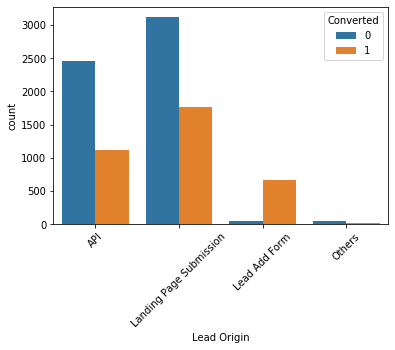

In [313]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df2)
xticks(rotation = 45)
plt.show()

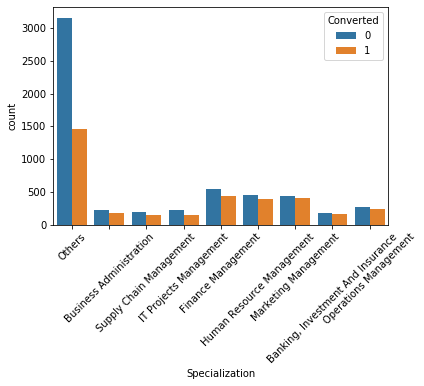

In [285]:
sns.countplot(x = "Specialization", hue = "Converted", data = df2)
xticks(rotation = 45)
plt.show()

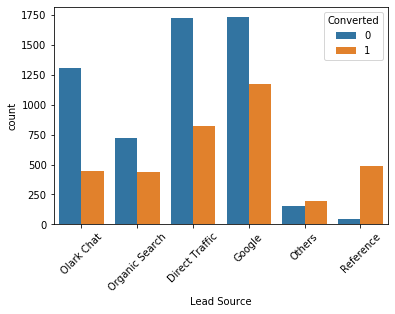

In [287]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df2)
xticks(rotation = 45)
plt.show()

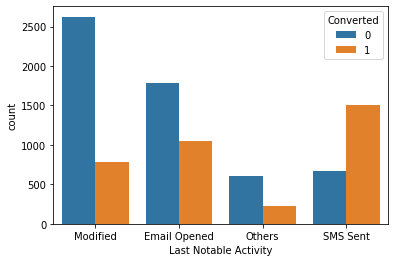

In [288]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df2)
plt.show()

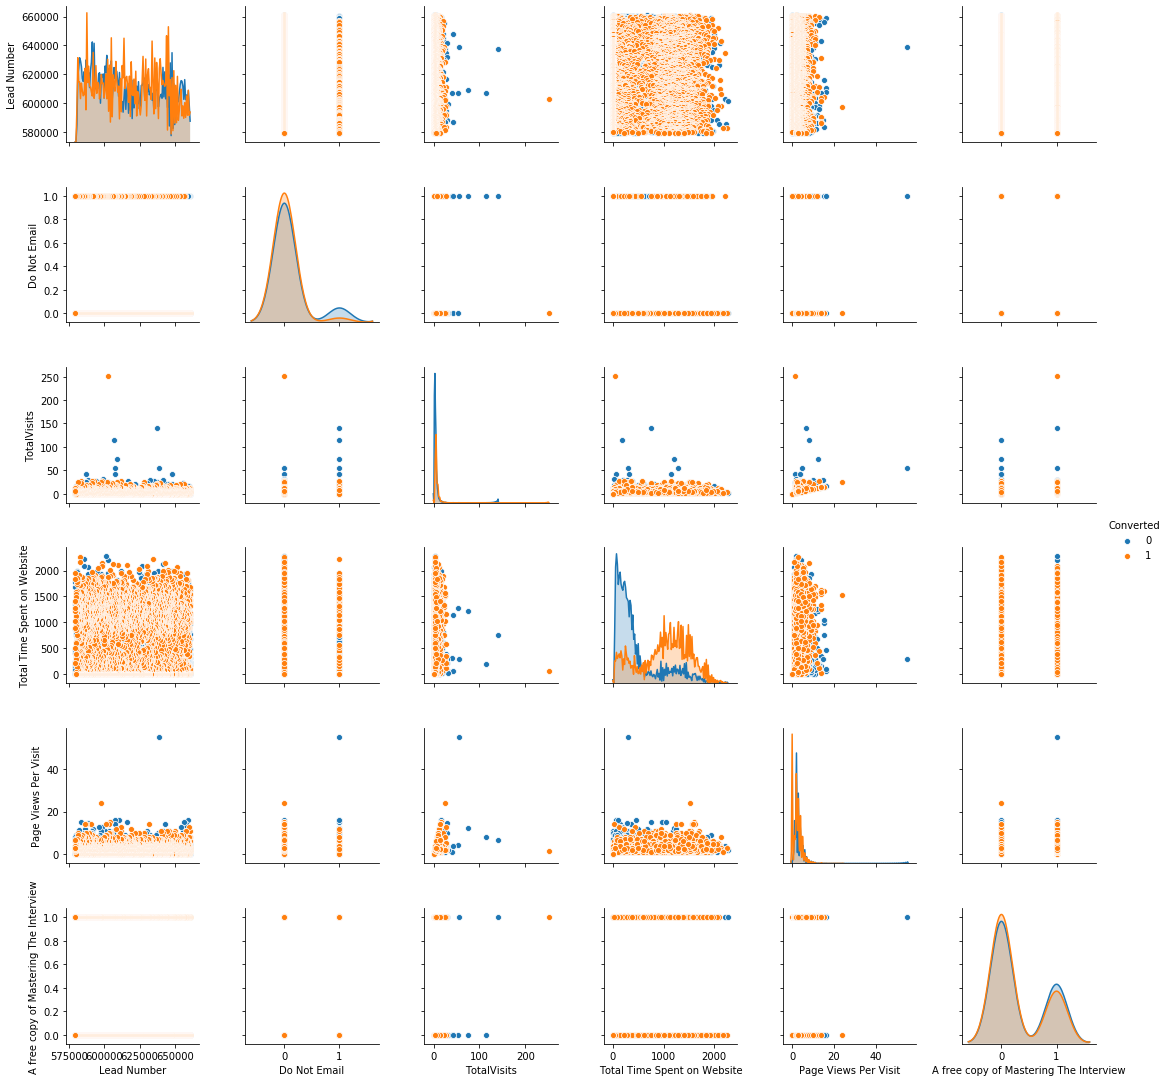

In [316]:

sns.pairplot(df2, hue ="Converted", diag_kws={'bw': 0.2})

### Dummy Variables

In [232]:
dummy = pd.get_dummies(df2[['Lead Origin','Lead Source','Specialization','Last Notable Activity']])

In [233]:
df2 = pd.concat([df2, dummy], axis=1)

In [234]:
df2.shape

(9240, 34)

In [235]:
df2 = df2.drop(['Lead Origin','Lead Source','Specialization','Last Notable Activity'], axis = 1)

In [236]:
df2.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,660737,0,0,0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,660728,0,0,5,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,660727,0,1,2,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,660719,0,0,1,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,660681,0,1,2,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [237]:
df2 = df2.drop(['Lead Origin_Others','Lead Source_Others','Specialization_Others','Last Notable Activity_Others'], axis = 1)

In [238]:
df2.shape

(9240, 26)

In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Number                                       9240 non-null   int64  
 1   Do Not Email                                      9240 non-null   int64  
 2   Converted                                         9240 non-null   int64  
 3   TotalVisits                                       9240 non-null   object 
 4   Total Time Spent on Website                       9240 non-null   int64  
 5   Page Views Per Visit                              9240 non-null   float64
 6   A free copy of Mastering The Interview            9240 non-null   int64  
 7   Lead Origin_API                                   9240 non-null   uint8  
 8   Lead Origin_Landing Page Submission               9240 non-null   uint8  
 9   Lead Origin_Lead Ad

In [240]:
df2['TotalVisits'] = df2['TotalVisits'].astype(int)

### Test-Train Split

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# Putting feature variable to X
X = df2.drop(['Converted', 'Lead Number'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,0,0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,5,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,2,1532,2.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,1,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [80]:
# Putting response variable to y
y = df2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [81]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
1871,0,0,-0.885371,-1.088305,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
6795,0,4,0.005716,-0.473232,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3516,0,5,-0.691418,0.067847,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8105,0,5,1.365219,1.223999,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3934,0,0,-0.885371,-1.088305,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [84]:
### Checking the Converted Rate
Converted = (sum(df2['Converted'])/len(df2['Converted'].index))*100
Converted

38.53896103896104

#### It shows that there is 38.5% conversion rate

### Looking for Correlation

In [85]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

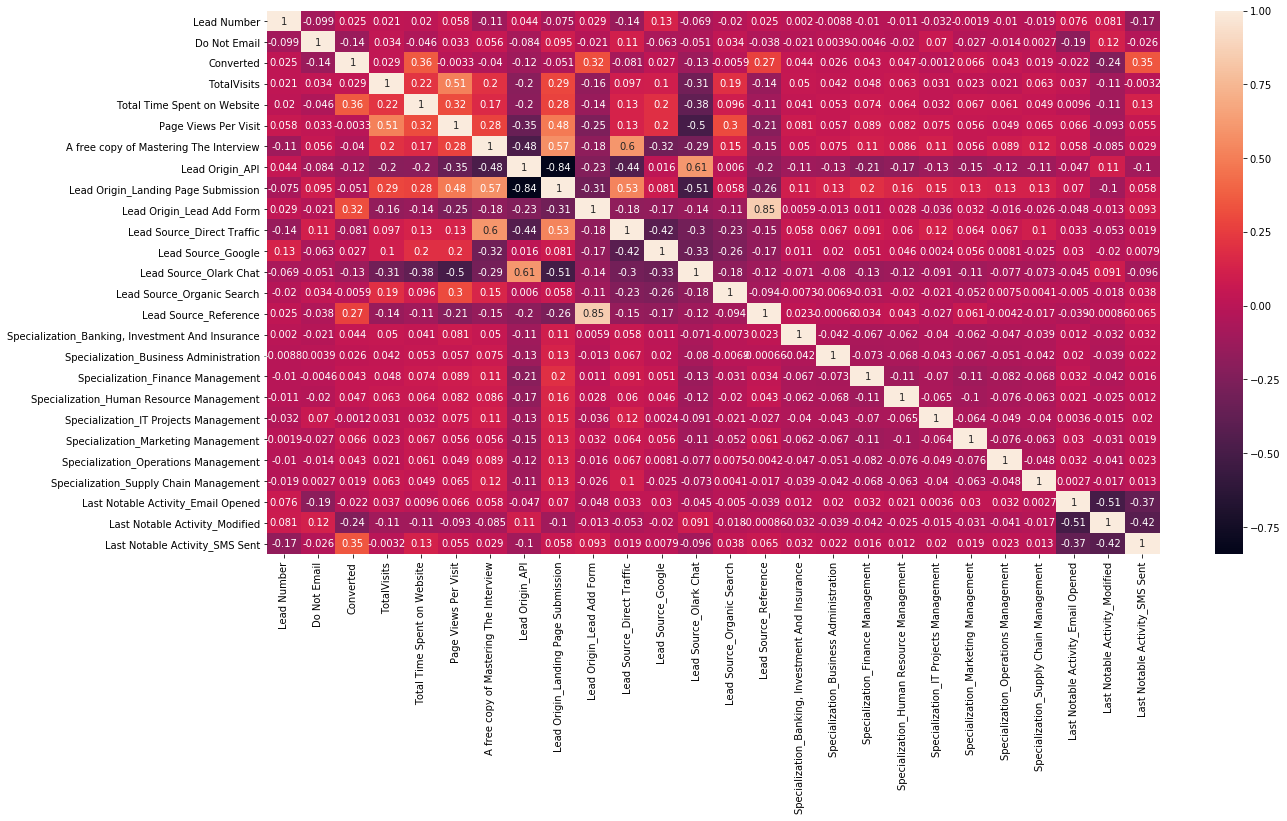

In [86]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df2.corr(),annot = True)
plt.show()

In [87]:
df2.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
0,660737,0,0,0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,660727,0,1,2,1532,2.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,660719,0,0,1,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,0,1,2,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [88]:
# Dropping highly correlated variables
X_test = X_test.drop(['Lead Origin_API'], 1)
X_train = X_train.drop(['Lead Origin_API'], 1)

In [89]:
X_train.shape

(6468, 23)

### Model Building

In [90]:
import statsmodels.api as sm

In [91]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.6
Date:                Sat, 24 Oct 2020   Deviance:                       5739.2
Time:                        19:00:00   Pearson chi2:                 6.75e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.4070      0.249     -5.641      0.000      -1.896      -0.918
Do Not Email                                        -1.1701      0.166     -7.058      0.000      -1.495      -0.845
TotalVisits                                          0.0328      0.009      3.556      0.000       0.015       0.051
Total Time Spent on Website                          1.1130      0.039     28.744      0.000       1.037       1.189
Page Views Per Visit                                -0.1071      0.050     -2.137      0.033      -0.205      -0.009
A free copy of Mastering The Interview              -0.0643      0.101     -0.634      0.526      -0.263       0.134
Lead Origin_Landing Page Submission                 -0.4180      0.111     -3.782      0.000      -0.635      -0.201
Lead Origin_Lead Add Form                            4.3172      0.405     10.673      0.000       3.524       5.110
Lead Source_Direct Traffic                          -0.4066      0.237     -1.715      0.086      -0.871       0.058
Lead Source_Google                                  -0.0802      0.223     -0.360      0.719      -0.517       0.356
Lead Source_Olark Chat                               0.6965      0.237      2.934      0.003       0.231       1.162
Lead Source_Organic Search                          -0.1170      0.237     -0.494      0.621      -0.581       0.347
Lead Source_Reference                               -0.6624      0.417     -1.589      0.112      -1.480       0.155
Specialization_Banking, Investment And Insurance     0.8311      0.187      4.449      0.000       0.465       1.197
Specialization_Business Administration               0.6028      0.170      3.553      0.000       0.270       0.935
Specialization_Finance Management                    0.8442      0.124      6.806      0.000       0.601       1.087
Specialization_Human Resource Management             0.6190      0.127      4.859      0.000       0.369       0.869
Specialization_IT Projects Management                0.8591      0.185      4.635      0.000       0.496       1.222
Specialization_Marketing Management                  0.7046      0.126      5.606      0.000       0.458       0.951
Specialization_Operations Management                 0.7717      0.151      5.100      0.000       0.475       1.068
Specialization_Supply Chain Management               0.6843      0.179      3.819      0.000       0.333       1.036
Last Notable Activity_Email Opened                   0.3270      0.129      2.526      0.012       0.073       0.581
Last Notable Activity_Modified                      -0.4019      0.131     -3.064      0.002      -0.659      -0.145
Last Notable Activity_SMS Sent           

### Feature Selection using RFE

In [92]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [93]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [94]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True])

In [95]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Reference', False, 4),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Supply Chain Management', True, 1),
 ('Last Notable Activity_Email Opened', False, 3),
 ('Last Notable Activity_Modified', 

In [96]:
col = X_train.columns[rfe.support_]

In [97]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Notable Activity_Email Opened'],
      dtype='object')

In [98]:
# Assesing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2889.8
Date:                Sat, 24 Oct 2020   Deviance:                       5779.7
Time:                        19:00:01   Pearson chi2:                 6.72e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -1.1131      0.084    -13.188      0.000      -1.279      -0.948
Do Not Email                                        -1.2063      0.160     -7.549      0.000      -1.519      -0.893
Total Time Spent on Website                          1.1129      0.038     28.947      0.000       1.038       1.188
Lead Origin_Landing Page Submission                 -0.5807      0.098     -5.906      0.000      -0.773      -0.388
Lead Origin_Lead Add Form                            3.9230      0.190     20.639      0.000       3.550       4.296
Lead Source_Olark Chat                               0.7869      0.112      7.002      0.000       0.567       1.007
Specialization_Banking, Investment And Insurance     0.8074      0.186      4.351      0.000       0.444       1.171
Specialization_Business Administration               0.5946      0.168      3.532      0.000       0.265       0.925
Specialization_Finance Management                    0.8317      0.123      6.788      0.000       0.592       1.072
Specialization_Human Resource Management             0.6255      0.126      4.971      0.000       0.379       0.872
Specialization_IT Projects Management                0.8022      0.183      4.383      0.000       0.444       1.161
Specialization_Marketing Management                  0.6825      0.124      5.510      0.000       0.440       0.925
Specialization_Operations Management                 0.7581      0.150      5.051      0.000       0.464       1.052
Specialization_Supply Chain Management               0.6460      0.178      3.637      0.000       0.298       0.994
Last Notable Activity_Modified                      -0.6787      0.079     -8.561      0.000      -0.834      -0.523
Last Notable Activity_SMS Sent                       1.4115      0.081     17.343      0.000       1.252       1.571
====================================================================================================================
"""

In [99]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.347738
6795    0.156113
3516    0.250558
8105    0.775049
3934    0.120240
4844    0.915720
3297    0.075435
8071    0.919451
987     0.246481
7423    0.923851
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34773787, 0.15611264, 0.25055795, 0.77504851, 0.12024036,
       0.91572021, 0.07543463, 0.91945073, 0.24648148, 0.9238511 ])

In [101]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.347738,1871
1,0,0.156113,6795
2,0,0.250558,3516
3,0,0.775049,8105
4,0,0.120240,3934


In [102]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.347738,1871,0
1,0,0.156113,6795,0
2,0,0.250558,3516,0
3,0,0.775049,8105,1
4,0,0.120240,3934,0


In [103]:
from sklearn import metrics

### Confusion matrix 

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3492  510]
 [ 796 1670]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7980828695114409


## VIF

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.33
13,Last Notable Activity_Modified,1.59
14,Last Notable Activity_SMS Sent,1.45
7,Specialization_Finance Management,1.43
4,Lead Source_Olark Chat,1.41
8,Specialization_Human Resource Management,1.36
10,Specialization_Marketing Management,1.33
3,Lead Origin_Lead Add Form,1.30
1,Total Time Spent on Website,1.23
11,Specialization_Operations Management,1.22


### Confusion Matrix

In [108]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6772100567721006

In [110]:
# Let us calculate specificity
TN / float(TN+FP)

0.8725637181409296

In [111]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12743628185907047


In [112]:
# positive predictive value 
print (TP / float(TP+FP))

0.7660550458715596


In [113]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8143656716417911


### ROC Curve

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


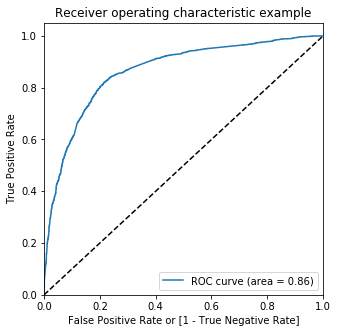

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Optimal Cutoff Point

In [117]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.347738,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.156113,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.250558,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.775049,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.120240,3934,0,1,1,0,0,0,0,0,0,0,0


In [118]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.519017  0.973236  0.239130
0.2   0.2  0.720315  0.910381  0.603198
0.3   0.3  0.795145  0.828467  0.774613
0.4   0.4  0.801639  0.763179  0.825337
0.5   0.5  0.798083  0.677210  0.872564
0.6   0.6  0.782158  0.559205  0.919540
0.7   0.7  0.760823  0.465937  0.942529
0.8   0.8  0.737013  0.366586  0.965267
0.9   0.9  0.689858  0.207218  0.987256


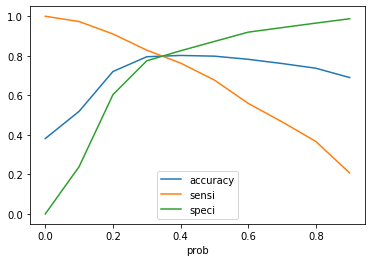

In [119]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### 0.3 is the optimum point to take it as a cutoff probability

In [120]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.347738,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.156113,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.250558,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.775049,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.120240,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [121]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7951453308596166

In [122]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3100,  902],
       [ 423, 2043]])

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8284671532846716

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.7746126936531734

In [126]:
# Calculate false postive rate - predicting converted when customer did not convert
print(FP/ float(TN+FP))

0.22538730634682658


In [127]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6937181663837012


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8799318762418393


### Precision and Recall

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3492,  510],
       [ 796, 1670]])

In [130]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7660550458715596

In [131]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6772100567721006

In [132]:
from sklearn.metrics import precision_score, recall_score

In [133]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7660550458715596

In [134]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6772100567721006

### Trade-off

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

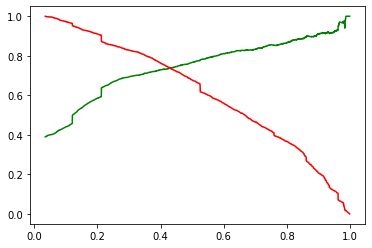

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on Test Set

In [139]:
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [140]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Supply Chain Management,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
4269,0,0.964504,0,0,0,0,0,0,0,0,0,0,0,0,1
2376,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,1
7766,0,-0.777416,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,0,-0.885371,0,0,1,0,0,0,0,0,0,0,0,1,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,1,0,0,0,0


In [141]:
X_test_sm = sm.add_constant(X_test)

In [142]:
y_test_pred = res.predict(X_test_sm)

In [143]:
y_test_pred[:10]

4269    0.797669
2376    0.962167
7766    0.208786
9199    0.120240
4359    0.924633
9186    0.686966
1631    0.553645
8963    0.174698
8007    0.138766
5324    0.421566
dtype: float64

In [144]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [145]:
# Let's see the head
y_pred_1.head()

,0
4269,0.797669
2376,0.962167
7766,0.208786
9199,0.120240
4359,0.924633


In [146]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [147]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [148]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [149]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [150]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.797669
1,1,2376,0.962167
2,1,7766,0.208786
3,0,9199,0.120240
4,1,4359,0.924633


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [152]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.797669
1,1,2376,0.962167
2,1,7766,0.208786
3,0,9199,0.120240
4,1,4359,0.924633


In [153]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [154]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,1,4269,0.797669,1
1,1,2376,0.962167,1
2,1,7766,0.208786,0
3,0,9199,0.120240,0
4,1,4359,0.924633,1


In [155]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8041125541125541

In [156]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1412,  265],
       [ 278,  817]])

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [158]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7461187214611872

In [159]:
# Let us calculate specificity
TN / float(TN+FP)

0.8419797257006559

### Adding Lead Score to the dataframe

In [160]:
y_pred_final['Lead Score'] = list(map(lambda x: x*100 , y_pred_final['Converted_Prob']))

In [162]:
y_pred_final.head(100)

,Converted,Lead Number,Converted_Prob,final_predicted,Lead Score
0,1,4269,0.797669,1,79.766928
1,1,2376,0.962167,1,96.216683
2,1,7766,0.208786,0,20.878609
3,0,9199,0.120240,0,12.024036
4,1,4359,0.924633,1,92.463312
5,1,9186,0.686966,1,68.696576
6,1,1631,0.553645,1,55.364489
7,1,8963,0.174698,0,17.469786
8,0,8007,0.138766,0,13.876586
9,1,5324,0.421566,1,42.156638
